# How to Tag Text

In [ ]:
# install the spaCy library
!pip install spacy

In [ ]:
# download the small English model (web model) 
# this gives us a pretrained pipeline we can use for tagging, NER, parsing, etc.
!python3 -m spacy download en_core_web_sm

In [19]:
# settings to be used while pretty printing
col_width = 15

In [12]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp("Ada Lovelace wrote the first algorithm for Babbage's Analytical Engine in 1843.")

In [132]:
for token in doc:
    print(f"{token.i:<{col_width}} | { token.text:<{col_width}}")

0               | Ada            
1               | Lovelace       
2               | wrote          
3               | the            
4               | first          
5               | algorithm      
6               | for            
7               | Babbage        
8               | 's             
9               | Analytical     
10              | Engine         
11              | in             
12              | 1843           
13              | .              


In [131]:
for token in doc:
    print(f"{token.text:<{col_width}} | {token.pos_:<{col_width}}")

Ada             | PROPN          
Lovelace        | PROPN          
wrote           | VERB           
the             | DET            
first           | ADJ            
algorithm       | NOUN           
for             | ADP            
Babbage         | PROPN          
's              | PART           
Analytical      | PROPN          
Engine          | PROPN          
in              | ADP            
1843            | NUM            
.               | PUNCT          


In [20]:
for token in doc:
    print(f"{token.text:<{col_width}} | {token.dep_:<{col_width}} | {token.head.text:<{col_width}}")

Ada             | compound        | Lovelace       
Lovelace        | nsubj           | wrote          
wrote           | ROOT            | wrote          
the             | det             | algorithm      
first           | amod            | algorithm      
algorithm       | dobj            | wrote          
for             | prep            | wrote          
Babbage         | poss            | Engine         
's              | case            | Babbage        
Analytical      | compound        | Engine         
Engine          | pobj            | for            
in              | prep            | wrote          
1843            | pobj            | in             
.               | punct           | wrote          


In [135]:
for token in doc:
    print(f"{token.text:<{col_width}} | {token.ent_type_:<{col_width}}")

Ada             | PERSON         
Lovelace        | PERSON         
wrote           |                
the             |                
first           | ORDINAL        
algorithm       |                
for             |                
Babbage         | ORG            
's              |                
Analytical      |                
Engine          |                
in              |                
1843            | DATE           
.               |                


<details>
<summary><strong>Historical Aside: Ada Lovelace</strong></summary>

The Analytical Engine was designed by Charles Babbage in the 1830s. This is considered the first conceptual design for a general-purpose programmable computer. It had a 'mill' (early CPU) and a 'store' (early RAM memory), and would have been programmed using punched cards.

Charles Babbage designed the Analytical Engine because he was trying to solve a serious 19th century problem: humans made too many calculation mistakes, especially in high stakes situations. 

He originally built the Difference Engine idea first — which was a machine to automate numeric table production (e.g. astronomy tables, navigation tables, engineering tables, actuarial tables, etc). These tables mattered because people died (e.g. ships crashed or bridges failed) from bad hand-computed math tables.

While designing the Difference Engine, Babbage realized you could build a general version — not just to compute polynomial tables — but a machine that could compute any symbolic rocedure if the procedure was represented in a systematic way.

The Analytical Engine was never created, however, because:
- Technology wasn’t ready: machining tolerances in the 1830s–1850s were nowhere near good enough to reliably build the precision cogs, gears, rods, memory storage racks, and punched card mechanisms at the required scale.
- Funding collapsed: The British government funded the earlier Difference Engine . . . but Babbage constantly revised designs, kept wanting improvements mid-build, and the Treasury basically gave up. 
- Politics + personality issues + constant redesigning killed institutional support.
- Manufacturing costs would have been massive: The Analytical Engine required tens of thousands of precision mechanical parts and Victorian era machine shops couldn’t scale it.
- He was too far ahead: People didn’t fully understand the idea of programmable computational generality. There was no field of "computer science" to justify the cost at the time.

Ada Lovelace wrote what is often considered the world's first published algorithm, and that algorithm was meant to be run on Babbage's Analytical Engine.
</details>

# Extracting Gendered Constructions with spaCy

https://www.kaggle.com/datasets/gpreda/politics-on-reddit

### The Ongoing Problem of Data-Driven Text Analysis

The process of extracting meaningful language patterns poses underlying challenges for any data-driven textual analysis. Here, this challenge is imagined as two-fold: analysts must determine which patterns are "meaningful" and analysts must apply the appropriate methods and tools to extract these meaningful patterns.

Analysts must also match guiding questions with an appropriate technique. They must be observant to how the methods and tools used to measure a corpus also give shape to the corpus and our analysis.

The purpose of this Notebook is thus to engage with this two-fold problem while text mining with spaCy NLP. 

In this exercise we will text mine a sample of the 2008 Subreddits: Worldnews, News, and Politics with the purpose of analyzing word co-occurance of grammatical gendered pronoun-verb pairs. These pairs are not necessarily consecutive, like bigrams, but instead share syntactic relations in a sentence.

This Notebook will ask a high-level, guiding question about gender: what kinds of actions are associated with male and female pronouns in this data set? 

### Getting Started

First import spaCy.

In [178]:
import spacy, warnings; warnings.simplefilter('ignore')
import pandas as pd

spaCy's language model can be loaded with `spacy.load()`. `spacy.load()` returns a `Language` object with the components and data required to process text such as a tagger and a tokenizer. 

For convention's-sake we will call our `Language` object `nlp`.

In [179]:
nlp = spacy.load('en_core_web_sm')

### Loading the Reddit data

The following code reads our sample into a pandas DataFrame.

In [234]:
%%time
reddit_sample_he_she = pd.read_csv("https://raw.githubusercontent.com/EmoryHPC/DSCI-340/main/reddit_sample.csv")

CPU times: user 17.5 ms, sys: 3 ms, total: 20.5 ms
Wall time: 318 ms


In [235]:
reddit_sample_he_she

,title,score,id,url,comms_num,created,body,timestamp
0,Comment,1,h76nykr,NaN,0,1627722415,Why would he be going to prison?,2021-07-31T12:06:55Z
1,Comment,1,h76nvl0,NaN,0,1627722333,Long term options that have a long time to exp...,2021-07-31T12:05:33Z
2,Comment,1,h76nraa,NaN,0,1627722222,Sure it was illegal. But it's okay. He has a l...,2021-07-31T12:03:42Z
3,Comment,1,h76nku3,NaN,0,1627722053,He can't and he does. And the shoulders in his...,2021-07-31T12:00:53Z
4,Comment,1,h76nipc,NaN,0,1627721996,I’ve always wondered why the insurgents would ...,2021-07-31T11:59:56Z
...,...,...,...,...,...,...,...,...
2664,Comment,1,hocj7ch,NaN,0,1639374713,Pelosi is not a neoliberal and she was literal...,2021-12-13T07:51:53Z
2665,Comment,1,hocj474,NaN,0,1639374657,"I think it will require more than that like ""H...",2021-12-13T07:50:57Z
2666,Comment,1,hocj1ea,NaN,0,1639374610,I did. Good for her! She was quite the dish,2021-12-13T07:50:10Z
2667,Comment,1,hocizj2,NaN,0,1639374577,"Just to set the record straight, he’s EIGHTY T...",2021-12-13T07:49:37Z


After reading our sample, we can transform it into a pandas series object for quicker processing. Please note that in doing so, we loose the "subreddit" column, which leaves us with just the text of the subreddits.

In [236]:
reddit_sample_he_she_text = reddit_sample_he_she['body'].copy()

In [237]:
reddit_sample_he_she_text

0                        Why would he be going to prison?
1       Long term options that have a long time to exp...
2       Sure it was illegal. But it's okay. He has a l...
3       He can't and he does. And the shoulders in his...
4       I’ve always wondered why the insurgents would ...
                              ...                        
2664    Pelosi is not a neoliberal and she was literal...
2665    I think it will require more than that like "H...
2666          I did. Good for her! She was quite the dish
2667    Just to set the record straight, he’s EIGHTY T...
2668    Unfortunately, the odds could be better than y...
Name: body, Length: 2669, dtype: object

### Parsing Text with spaCy

As demonstrated in [Klein's Notebook](https://github.com/laurenfklein/emory-qtm340/blob/master/notebooks/class11-nlp-spacy-complete.ipynb), invoking `nlp` on a string of text will return a processed `Doc` object. Within each `Doc` object is a spaCy `token` object. From these `token` objects we can access a word's lemmatized form, its part-of-speech, and other attributes.

Unlike Klein's data, however, ours is in a series object where each row is a string of text. We must iterate through each row of the data frame with `nlp.pipe()`, which processes the data in small batches. To improve parsing time we can disable features that we will not use for this exercise like named entity recognition (or `ent`).

In [184]:
%%time
reddit_sample_he_she_text = list(nlp.pipe(reddit_sample_he_she_text, disable = ["ent"]))

CPU times: user 9.28 s, sys: 43.8 ms, total: 9.32 s
Wall time: 9.33 s


In [185]:
reddit_sample_he_she_text[:8]

[Why would he be going to prison?,
 Long term options that have a long time to expire are riskier and thus more rewarding. He bought them in February. The legislature that affects them wasn’t cooked up in a day. It’s possible that he was lucky, sure. However it’s not a one time event for the Pelosi’s. It’s all speculation, but he sure is “in the right place at the right time” with his trades.,
 Sure it was illegal. But it's okay. He has a little 'R' behind his name. So all crimes are allowed.,
 He can't and he does. And the shoulders in his suits are full padding to hide the shoulder slump.,
 I’ve always wondered why the insurgents would do this. If Jan. 6 succeeded, I’m pretty sure trump would’ve turned around and stabbed em in the backs because he would see them as a threat to his power. If they were willing to cause a riot once, they would probably do it again. Pretty sure the rioters thought they would get a presidential pardon or even government seats but no, trump is that big of 

`reddit_sample_he_she_text` looks just like any other list, but it is actually a spaCy `doc` object where every word is a spaCy `token` object. We will explore the objects' attributes in the following section. 

### Processing spaCy `token` Objects for Part-of-Speech Extraction

For our analysis, we are just interested in the spaCy `token` objects inside the `doc` object. The `token` objects include attributes such as:

 - `.text`: the original word
 - `.lemma_`: the word's lemmatized form
 - `.pos_`: the word's part-of-speech
 - `.dep_`: the word's syntactic dependency
 - `.head.text`: the word upon which the present word is dependent

These attributes can be viewed by iterating through each `doc` object like the following code:

### Lemmatization

When analysts do word counts, they often want to treat singular and plural forms as the same word. For example, the following should be counted as the same concept:

* giraffe
* giraffes

One simple approach is stemming — this tells the computer to look for very common English endings like “s,” “ed,” and “ing” and remove them. But stemming fails for many English irregular forms:

* wolf / wolves
* woman / women

This is why we often use lemmatization instead.

In Python, spaCy automatically detects the lemma of a word — even when the form is irregular — by using its internal language model and part-of-speech information. So spaCy knows that “wolves” → “wolf” and “women” → “woman” without the analyst having to manually create lists.

Lemmatization in spaCy therefore gives analysts cleaner, more accurate counts and makes it much easier to group variants of the same concept together.

In [186]:
def extractTokens(spacy_doc_object):
    spacy_tokens = []
    for doc in spacy_doc_object:
        for token in doc:
            row = (token.text, token.lemma_, token.pos_, token.dep_, token.head.text)
            spacy_tokens.append(row)
    return spacy_tokens

reddit_tokens = extractTokens(reddit_sample_he_she_text)

In [187]:
reddit_tokens[:30]

[('Why', 'why', 'SCONJ', 'advmod', 'going'),
 ('would', 'would', 'AUX', 'aux', 'going'),
 ('he', 'he', 'PRON', 'nsubj', 'going'),
 ('be', 'be', 'AUX', 'aux', 'going'),
 ('going', 'go', 'VERB', 'ROOT', 'going'),
 ('to', 'to', 'ADP', 'prep', 'going'),
 ('prison', 'prison', 'NOUN', 'pobj', 'to'),
 ('?', '?', 'PUNCT', 'punct', 'going'),
 ('Long', 'long', 'ADJ', 'amod', 'options'),
 ('term', 'term', 'NOUN', 'compound', 'options'),
 ('options', 'option', 'NOUN', 'nsubj', 'are'),
 ('that', 'that', 'PRON', 'nsubj', 'have'),
 ('have', 'have', 'VERB', 'relcl', 'options'),
 ('a', 'a', 'DET', 'det', 'time'),
 ('long', 'long', 'ADJ', 'amod', 'time'),
 ('time', 'time', 'NOUN', 'dobj', 'have'),
 ('to', 'to', 'PART', 'aux', 'expire'),
 ('expire', 'expire', 'VERB', 'relcl', 'time'),
 ('are', 'be', 'AUX', 'ROOT', 'are'),
 ('riskier', 'risky', 'ADJ', 'acomp', 'are'),
 ('and', 'and', 'CCONJ', 'cc', 'riskier'),
 ('thus', 'thus', 'ADV', 'advmod', 'more'),
 ('more', 'more', 'ADV', 'advmod', 'rewarding'),
 ('

Before continuing, let's take a moment to observe the output of `reddit_tokens`.

`reddit_tokens` is split into one token per row. Alongside each token is: a) the token, b) the token's lemmatized form, c) the tokens part-of-speech, d) the token's syntactic function, and e) the token's "head", or the token to which it syntactically depends.

In [225]:
remove_list = [
    # punctuation
    ".", ",", ":", ";", "!", "?", "(", ")", "[", "]", "{", "}", "—", "–", "-", "_",
    "/", "\\", "'", '"', "…", "“", "”", "‘", "’", "*", "+", "=", "<", ">", "|",
    "#", "$", "%", "^", "&", "@", "~", "`",

    # stopwords
    "a", "an", "the", "and", "or", "but", "if", "then", "when", "while", "for",
    "nor", "so", "of", "to", "from", "in", "out", "on", "off", "over", "under",
    "up", "down", "with", "as", "by", "at", "it", "its", "this", "that", "these",
    "those", "there", "here", "’s"

    # modal verbs to remove (added)
    "would", "should", "could", "can", "may", "might", "must", "shall", "will",

    # whitespace artifacts
    " ", "\n\n"
]


In [226]:
filtered_lemmas = []

for row in reddit_tokens:
    lemma_value = row[1]            # lemma column
    lemma_value_lower = lemma_value.lower()

    # if the lemma is NOT in our remove list, then keep it
    if lemma_value_lower not in remove_list:
        filtered_lemmas.append(row)

### Count Top Lemmas

In [227]:
from collections import Counter

lemma_counts = Counter([lemma[1] for lemma in filtered_lemmas])
lemma_counts.most_common(30)

[('be', 7654),
 ('he', 4267),
 ('not', 2697),
 ('I', 2210),
 ('do', 2113),
 ('have', 1933),
 ('they', 1276),
 ('she', 1148),
 ('you', 1124),
 ('his', 1011),
 ('say', 733),
 ('get', 698),
 ('would', 686),
 ('we', 641),
 ('just', 633),
 ('people', 597),
 ('like', 586),
 ('about', 586),
 ('all', 585),
 ('what', 570),
 ('go', 563),
 ('think', 507),
 ('who', 492),
 ('because', 464),
 ('’s', 456),
 ('no', 453),
 ('Trump', 451),
 ('know', 423),
 ('how', 422),
 ('make', 421)]

### Count Top Lemmatized Nouns

In [228]:
noun_counts = Counter([row[1] for row in filtered_lemmas if row[2] == "NOUN"])
noun_counts.most_common(30)

[('people', 596),
 ('time', 310),
 ('thing', 287),
 ('year', 278),
 ('trump', 254),
 ('way', 196),
 ('election', 183),
 ('state', 168),
 ('party', 157),
 ('woman', 156),
 ('money', 140),
 ('law', 140),
 ('power', 138),
 ('country', 138),
 ('shit', 137),
 ('president', 137),
 ('day', 135),
 ('person', 135),
 ('life', 134),
 ('guy', 133),
 ('point', 123),
 ('fact', 122),
 ('right', 120),
 ('one', 116),
 ('voter', 114),
 ('man', 113),
 ('vote', 113),
 ('lot', 109),
 ('case', 104),
 ('government', 103)]

### Count Top Lemmatized Nouns

In [229]:
verb_counts = Counter([row[1] for row in filtered_lemmas if row[2] == "VERB"])
verb_counts.most_common(30)

[('have', 1049),
 ('do', 800),
 ('say', 725),
 ('get', 582),
 ('go', 559),
 ('think', 505),
 ('know', 423),
 ('make', 421),
 ('want', 328),
 ('see', 254),
 ('be', 247),
 ('take', 231),
 ('try', 213),
 ('give', 208),
 ('come', 199),
 ('vote', 189),
 ('mean', 188),
 ('look', 176),
 ('need', 175),
 ('tell', 174),
 ('pay', 171),
 ('use', 171),
 ('run', 161),
 ('believe', 152),
 ('work', 146),
 ('lose', 146),
 ('win', 140),
 ('happen', 139),
 ('keep', 127),
 ('let', 120)]

### Count Top Lemmatized Adjectives

In [232]:
adj_counts = Counter([row[1] for row in filtered_lemmas if row[2] == "ADJ"])
adj_counts.most_common(30)

[('more', 237),
 ('other', 221),
 ('good', 207),
 ('bad', 155),
 ('same', 151),
 ('many', 134),
 ('right', 128),
 ('own', 112),
 ('sure', 109),
 ('political', 91),
 ('first', 85),
 ('most', 85),
 ('only', 83),
 ('new', 82),
 ('much', 80),
 ('big', 79),
 ('least', 79),
 ('wrong', 78),
 ('real', 70),
 ('old', 69),
 ('last', 68),
 ('republican', 63),
 ('stupid', 61),
 ('high', 61),
 ('different', 60),
 ('sexual', 60),
 ('well', 59),
 ('few', 58),
 ('enough', 56),
 ('great', 54)]

### Extracting Parts-of-Speech from Parsed Reddit Text

Now we can begin extracting grammatical parts-of-speech for the purpose of looking for language trends. The following code extracts grammatical pairs where the subject is tagged as a noun subject or passive noun subject, and is also a "child" of a verb. 

The verb is lemmatized to prevent counting inflectional verbs separately from their base form.

In [188]:
from spacy.symbols import nsubj, nsubjpass, VERB

def extractPairs(spacy_doc_object):
    pairs = []
    for doc in spacy_doc_object:
        for subject in doc:
            if subject.dep == nsubj or subject.dep == nsubjpass and subject.head.pos == VERB:
                extracted_pairs = subject.text, subject.head.lemma_
                concat_extracted_pairs = ' '.join(extracted_pairs)
                pairs.append(str(concat_extracted_pairs))
    return pairs

pairs = extractPairs(reddit_sample_he_she_text)

In [189]:
pairs[:30]

['he go',
 'options be',
 'that have',
 'He buy',
 'legislature cook',
 'that affect',
 'It ’',
 'he be',
 'it ’s',
 'It ’',
 'he be',
 'it be',
 'it be',
 'He have',
 'crimes allow',
 'He can',
 'he do',
 'shoulders be',
 'I wonder',
 'insurgents do',
 'Jan. succeed',
 'I ’m',
 'trump turn',
 '’ve turn',
 'he see',
 'they be',
 'they do',
 'rioters think',
 'they get',
 'trump be']

`pairs` is a list subjects followed by verbs.

For the sake of counting and matching with words regardless of case, we can transform all words to lower case.

In [190]:
lowercase_pairs = [word.lower() for word in pairs]

In [191]:
lowercase_pairs[:30]

['he go',
 'options be',
 'that have',
 'he buy',
 'legislature cook',
 'that affect',
 'it ’',
 'he be',
 'it ’s',
 'it ’',
 'he be',
 'it be',
 'it be',
 'he have',
 'crimes allow',
 'he can',
 'he do',
 'shoulders be',
 'i wonder',
 'insurgents do',
 'jan. succeed',
 'i ’m',
 'trump turn',
 '’ve turn',
 'he see',
 'they be',
 'they do',
 'rioters think',
 'they get',
 'trump be']

We can narrow these results to just pairs containing gendered pronouns for the purpose of exploring our guiding question: what kinds of actions are associated with male and female pronouns in the decade 1870?

### Filtering for Gendered Pronoun-Verb Pairs

The goal of this Notebook is to extract gendered pronoun-verb pairs and create visualizations that compare male pronoun-verb pairs and female pronoun-verb pairs. First, however, we will just extract pairs with the pronoun he.

We can search for "he" and its grammatical verbs by treating "he" as a regular expression (or sequence of characters that define a search pattern). The following code defines our regular expression, `('he ')`, and creates a variable for each pair that contains a match.

In [192]:
import re

def extractMalePairs(pairs):
    regex = re.compile('he ')
    male = [word for word in lowercase_pairs if regex.match(word)]
    return male

male = extractMalePairs(lowercase_pairs)

In [193]:
male[:30]

['he go',
 'he buy',
 'he be',
 'he be',
 'he have',
 'he can',
 'he do',
 'he see',
 'he be',
 'he downplay',
 'he encourage',
 'he do',
 'he pay',
 'he be',
 'he do',
 'he ’',
 'he know',
 'he be',
 'he be',
 'he express',
 'he say',
 'he say',
 'he be',
 'he recognize',
 'he make',
 'he be',
 'he do',
 'he be',
 'he be',
 'he cock']

Viewing just the first 30 lines of our lists shows us that our gendered pronoun-verb pairs contain stop words like be or say. Pairs containing a stop word can be removed. 

We can do this by first defining our stop words . . . 

In [194]:
stopwords = ['right', 'hon', 'general', 'mr', 'shall', 'majesty', 'exchequer', 'address', 'motion', 'bill',
             'earl', 'friend', 'chancellor', 'sense', 'object', 'suppose', 'amidst', 'noble', 'lord', 'agree',
             'speech', 'kind', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
             'october', 'november', 'december', 'order', 'held', 'hold', 'assembly', '£', 'humble', 'about', 'above',
             'across', 'address', 'after', 'afterwards', 'again', 'against', 'agree', 'all', 'almost', 'alone', 'along',
             'already', 'also', 'although', 'always', 'am', 'amidst', 'among', 'amongst', 'amount', 'an', 'and', 'another',
             'any', 'anyhow', 'anything', 'anyway', 'anywhere', 'april', 'are', 'around', 'as', 'at', 'back', 'be', 'was',
             'becames', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
             'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'do',
             'could', 'did', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'either', 'else', 'elsewhere',
             'empty', 'enough', 'even', 'ever', 'everyone', 'everything', 'everywhere', 'except', 'few', 'first', 'for',
             'from', 'front', 'full', 'further', 'general', 'get', 'give', 'go', 'had', 'has', 'have', 'held', 'hence',
             'here', 'hereby', 'herein', 'hold', 'however', 'if', 'in', 'indeed', 'into', 'is', 'it', 'its', 'itself',
             'just', 'keep', 'kind', 'last', 'latter', 'least', 'less', 'made', 'make', 'many', 'me', 'meanwhile', 'might',
             'mine', 'more', 'most', 'mostly', 'move', 'much', 'must', 'name,' 'neither', 'never', 'nevertheless', 'next',
             'no', 'noble', 'nobody', 'none', 'nor', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'one', 'once',
             'only', 'onto', 'or', 'other', 'others', 'otherwise', 'out', 'over', 'own', 'part', 'perhaps', 'please', 'put',
             'quite', 'rather', 'really', 'regarding', 'same', 'say', 'see', 'seem', 'seemed', 'seeming', 'seems', 'sense',
             'several', 'shall', 'should', 'show', 'side', 'since', 'so', 'some', 'someone', 'something', 'sometime',
             'still', 'such', 'suppose', 'take', 'than', 'that', 'the', 'then', 'there', 'thereby', 'therefore', 'these',
             'they', 'this', 'those', 'though', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'under',
             'unless', 'until', 'up', 'upon', 'us', 'used', 'using', 'various', 'very', 'was', 'we', 'well', 'were', 'what',
             'whatever', 'when', 'when', 'whereby', 'whether', 'which', 'while', 'who', 'why', 'will', 'with', 'within',
             'without', 'would', 'yet', 'bright', 'mr.', 'hansard', 'lancashire', '[]', '£1', '000', 'russell', 'committee',
             'reading', 'learned', 'deal', 'time', 'royal', 'gentlemen', 'gentleman', 'year', 'years', 'affairs', 'affair',
             'academy', 'sir', 'thought', 'took', 'bring', 'brings', 'brought', 'forward', 'great', 'good', 'department',
             'treasury', 'second', 'take', 'taken', 'privy', 'member', 'robert', 'large', 'session', 'secretary', 'notice',
             'moment', 'think', 'believe', 'hope', 'ask', 'hear', 'beg', 'support', 'state', 'find', 'admit', 'wish',
             'refer', 'reply', 'know', 'feel', 'propose', 'understand', 'let', 'allow', 'like', 'receive', 'consider',
             'begin', 'tell', 'like', 'send', 'ought', 'come', 'intend', 'add', 'want', 'stand', 'suggest', 'remind',
             'use', 'mean', 'suggest', 's', '’', '’s']

. . . and then matching this list with our pairs to see whether any tokens match a stop word.

The following code removes stop words by a) splitting the pair into individual tokens, b) creating a variable, `tokens_filtered` for just words that do not match a stop word, and c) joining indiviudal words back together to make a pair.

In [195]:
tokens_joined = []

for pair in male:
    tokens = pair.split(" ")
    tokens_filtered = [word for word in tokens if not word in stopwords]
    tokens = " ".join(tokens_filtered)
    tokens_joined.append(str(tokens))

In [196]:
tokens_joined[:30]

['he',
 'he buy',
 'he',
 'he',
 'he',
 'he',
 'he',
 'he',
 'he',
 'he downplay',
 'he encourage',
 'he',
 'he pay',
 'he',
 'he',
 'he',
 'he',
 'he',
 'he',
 'he express',
 'he',
 'he',
 'he',
 'he recognize',
 'he',
 'he',
 'he',
 'he',
 'he',
 'he cock']

We have a problem, however. After joining the individual words we are left with messy data: some strings only have one word because the other word was removed. 

We can remove these individual tokens by writing a line of logic that only keeps strings that are the length of two (i.e. strings that are pairs). 

In [197]:
def removeStopWords(pairs):
    keep_pairs = []
    for pair in pairs:
        tokens = pair.split(" ")
        tokens_filtered = [word for word in tokens if not word in stopwords]
        joined_tokens = " ".join(tokens_filtered)
        if len(tokens_filtered) == 2: # if string is length of two
            keep_pairs.append(str(joined_tokens)) # keep the string
    return keep_pairs

male_no_stopwords = removeStopWords(male)

In [198]:
male_no_stopwords[:30]

['he buy',
 'he downplay',
 'he encourage',
 'he pay',
 'he express',
 'he recognize',
 'he cock',
 'he walk',
 'he turn',
 'he kill',
 'he execute',
 'he employ',
 'he employ',
 'he fly',
 'he boast',
 'he shoot',
 'he live',
 'he minimize',
 'he face',
 'he instigate',
 'he snap',
 'he laugh',
 'he extend',
 'he arrest',
 'he deign',
 'he pass',
 'he resign',
 'he bargain',
 'he realize',
 'he pursue']

### Counting Gendered Pronoun-Verb Pairs

After aggregating gendered pronouns that syntactically depend on a verb, we can count their frequency.

The following code defines a function, `countWords()`, that creates a dictionary of every unique pair and its frequency. Any pair not already in the dictionary is added. If the pair is already part of the dictionary its count increments by 1.

In [199]:
def countWords(clean_data):
    ngrams_dict = {}
    for ngram in clean_data:
        if ngram in ngrams_dict:
            ngrams_dict[ngram] += 1
        else:
            ngrams_dict[ngram] = 1
    return ngrams_dict
            
male_dictionary = countWords(male_no_stopwords)

In [200]:
for kv in list(male_dictionary)[:30]:
    print(kv,  male_dictionary[kv])

he buy 9
he downplay 1
he encourage 3
he pay 30
he express 1
he recognize 3
he cock 1
he walk 4
he turn 7
he kill 17
he execute 2
he employ 2
he fly 4
he boast 2
he shoot 15
he live 9
he minimize 1
he face 11
he instigate 2
he snap 2
he laugh 2
he extend 1
he arrest 7
he deign 1
he pass 4
he resign 20
he bargain 1
he realize 5
he pursue 1
he lose 37


Dictionaries do not store data in sequential order. This is because a dictionary is "hashable," and not linear like a list. While this makes dictionaries quick to process, its organization is not conducive to analysis.

Therefore, we will cast the pronoun-verb pairs and their counts to a pandas DataFrame.

In [201]:
male_pronoun_verb_counts = pd.DataFrame(male_dictionary.items(),columns = ['Pair','Count'])

In [202]:
male_pronoun_verb_counts

,Pair,Count
0,he buy,9
1,he downplay,1
2,he encourage,3
3,he pay,30
4,he express,1
...,...,...
526,he slip,1
527,he wiggle,1
528,he gamble,1
529,he spray,1


After creating a pandas DataFrame with our pronoun-verb pairs we can arrange the frequency counts so pairs with the highest count are first.

In [203]:
male_pronoun_verb_counts.sort_values(by=['Count'], inplace=True, ascending=False)

In [204]:
male_pronoun_verb_counts

,Pair,Count
38,he win,46
35,he try,40
29,he lose,37
63,he look,31
3,he pay,30
...,...,...
511,he pen,1
510,he wander,1
509,he paralyze,1
508,he dare,1


In [ ]:
# Instead of running spaCy on all the data again, I could save my processed dataset to my computer
# male_pronoun_verb_counts.to_csv('male_pronoun_verb_counts.csv') # save your variable to a CSV file on disk
# loaded_male_pronoun_verb_counts = pd.read_csv('male_pronoun_verb_counts.csv') # load your CSV file 

### Visualizing our Results for Analysis

We are now ready to visualize our results: grammatical pronoun-verb pairs that show us which verbs are commonly associated with the pronoun he in our Reddit sample of "Worldnews," "News," and "Politics."

The following code takes a subset of the first 25 rows of `male_pronoun_verb_counts`.

In [205]:
top_male_pronoun_verb_counts = male_pronoun_verb_counts[:25].copy()

In [206]:
top_male_pronoun_verb_counts

,Pair,Count
38,he win,46
35,he try,40
29,he lose,37
63,he look,31
3,he pay,30
30,he lie,29
94,he run,26
54,he vote,23
25,he resign,20
96,he need,18


These top grammatical pairs can now be visualized with matplotlib. 

The following code imports matplotlib, sets the plot's size, and renders the visualization.

In [207]:
import matplotlib as plt

plt.rcParams['figure.figsize'] = [15, 10]

top_male_pronoun_verb_counts.sort_values(by=['Count'], inplace=True, ascending=True)

<Axes: title={'center': 'Top Grammatical Pronoun-Verb Pairs with He: Searching the Worldnews, Politics, and News Subreddits'}, ylabel='Pair'>

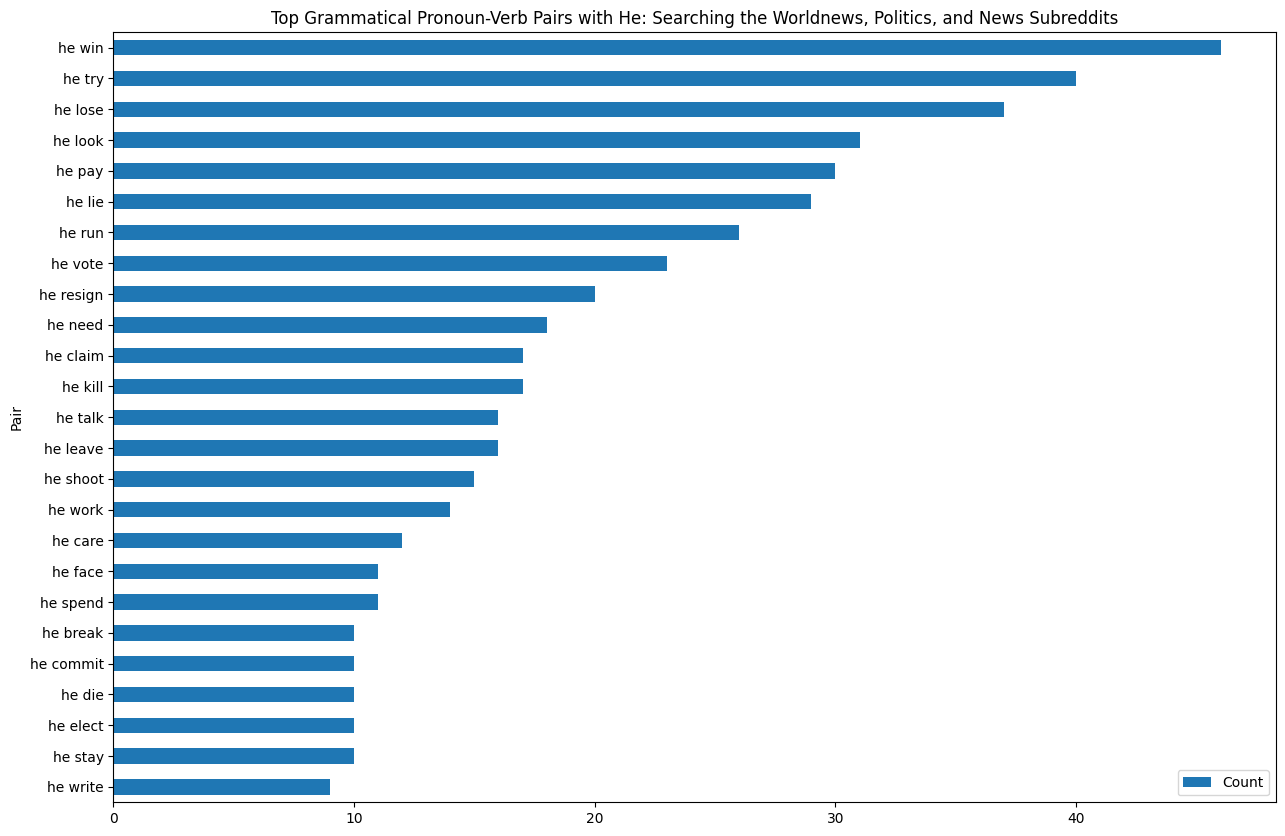

In [208]:
top_male_pronoun_verb_counts.plot.barh(x = "Pair", y = "Count",
            title = "Top Grammatical Pronoun-Verb Pairs with He: Searching the Worldnews, Politics, and News Subreddits")

> Note: This corpus has been edited. I censored the data and removed a common vulgar word.

### Reiterating the Process to Extract Female Grammatical Pronouns and their Verbs 

We can reiterate the same process outlined above to extract the pronoun she and its grammatical verbs. The following code defines one new function (to extract female pronoun-verb pairs) and then calls our already defined functions to render a bar graph of top pairs.

<Axes: title={'center': 'Top Grammatical Pronoun-Verb Pairs with She: Searching the Worldnews, Politics, and News Subreddits'}, ylabel='Pair'>

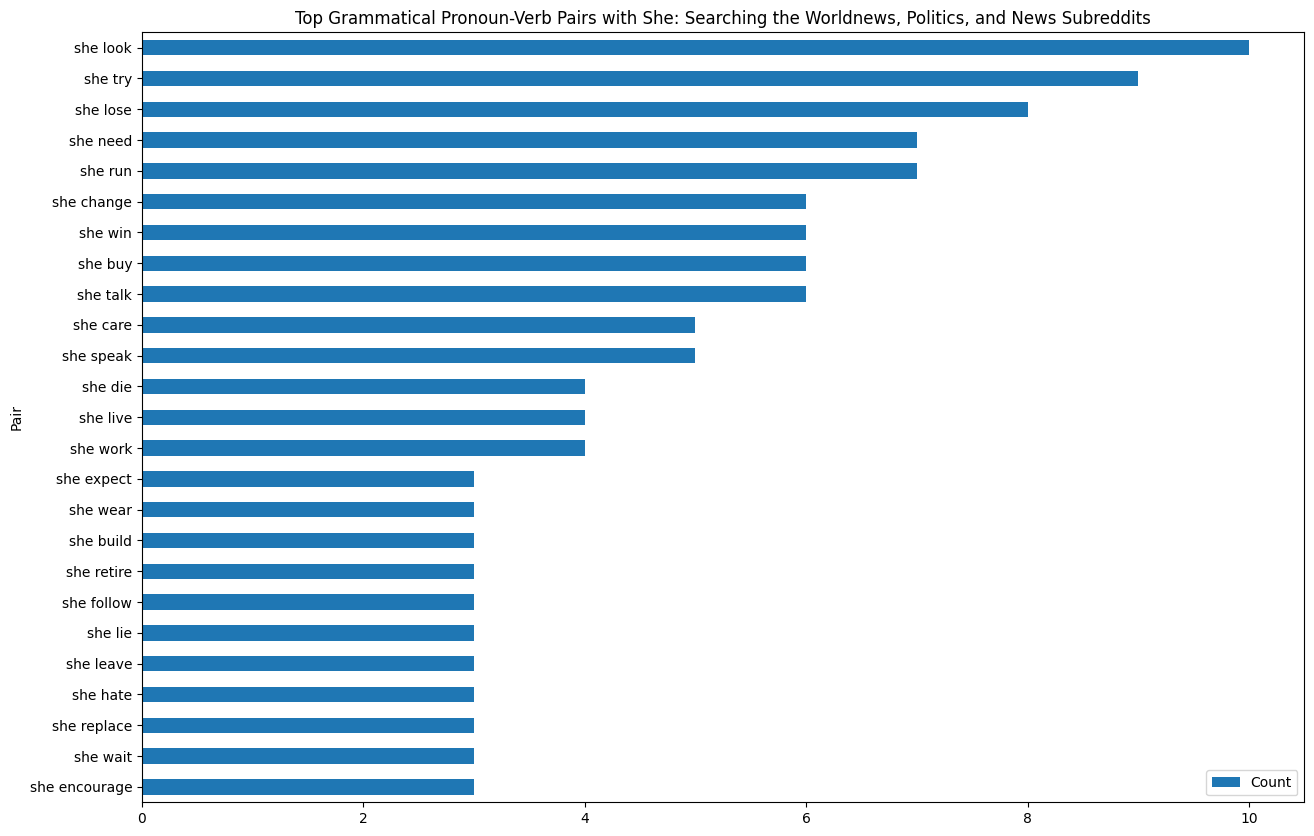

In [209]:
# extract grammatical pronoun-verb pairs where she is subject
def extractFemalePairs(pairs):
    regex = re.compile('she ')
    female = [word for word in lowercase_pairs if regex.match(word)]
    return female

female = extractFemalePairs(lowercase_pairs)

# remove stop words
female_no_stopwords = removeStopWords(female)

# create a dictionary with each unique pair and its frequency
female_dictionary = countWords(female_no_stopwords)

# create a data frame from our dictionary of grammatical pairs
female_pronoun_verb_counts = pd.DataFrame(female_dictionary.items(),columns = ['Pair','Count'])

# arrange in ascending order
female_pronoun_verb_counts.sort_values(by=['Count'], inplace=True, ascending=False)

# take a subset of the data
top_female_pronoun_verb_counts = female_pronoun_verb_counts[:25].copy()

# set the parameters of the visualization
plt.rcParams['figure.figsize'] = [15, 10]

# sort the pairs for visualization
top_female_pronoun_verb_counts.sort_values(by=['Count'], inplace=True, ascending=True)

# render visualization
top_female_pronoun_verb_counts.plot.barh(x = "Pair", y = "Count",
            title = "Top Grammatical Pronoun-Verb Pairs with She: Searching the Worldnews, Politics, and News Subreddits")

### Extracting Adjectives that Modify the Words "Man" and "Woman"

To keep our data sets small, you can read in another subset of the Reddit data which includes just sentences with the word "man" or "woman." 

In [241]:
reddit_man_woman_corpus = pd.read_csv("https://raw.githubusercontent.com/EmoryHPC/DSCI-340/main/reddit_politics.csv")

reddit_man_woman_corpus.head()

,title,score,id,url,comms_num,created,body,timestamp
0,A Right Wing Group in Texas Is Making up Fake ...,166,ov1ll3,https://www.vice.com/en/article/wx5bg5/blm-whi...,34,1.627710e+09,NaN,2021-07-31 08:35:47
1,DOJ sues Texas over Gov. Abbott’s order for la...,85,ouwc9i,https://www.kxan.com/news/texas-politics/doj-s...,17,1.627688e+09,NaN,2021-07-31 02:26:12
2,"From white evangelicals to QAnon believers, wh...",57,ouqkxi,https://www.modbee.com/news/coronavirus/articl...,27,1.627671e+09,NaN,2021-07-30 21:45:09
3,DeSantis says he’ll sign order allowing parent...,269,oun2lc,https://www.orlandosentinel.com/politics/os-ne...,138,1.627660e+09,NaN,2021-07-30 18:43:05
4,"Show on the road: In Utah, Florida Gov. Ron De...",31,ouipnz,https://www.tallahassee.com/story/news/politic...,28,1.627644e+09,NaN,2021-07-30 14:21:54


In [242]:
reddit_man_woman_corpus_text = reddit_man_woman_corpus['body'].copy()

reddit_man_woman_corpus_text = list(nlp.pipe(reddit_man_woman_corpus_text, disable = ["ent"]))

ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>

As mentioned, you can modiy the code in this Notebook to extract female adjective-noun pairs. To see what I mean, let's get started on this problem together.

We know we already have functions that count pairs, create DataFrames, and visualize our results. Therefore, we just need to change the code that determines which pairs are extracted. Instead of extracting noun-verb pairs we want to extract adjective-noun pairs. 

So, let's return to the `extractPairs()` function and modify it for our assignment. Instead of using the symbols `nsubj` (for noun subject), `nsubjpass` (for passive noun subject) and `VERB`, we will use `amod` (for adjectival modifier), `acomp` (for adjectival complement), and `NOUN`. 

In [137]:
from spacy.symbols import amod, acomp, NOUN

def extractAdjNounPairs(spacy_doc_object):
    pairs = []
    for doc in spacy_doc_object:
        for adjective in doc:
            if adjective.dep == amod or adjective.dep == acomp and adjective.head.pos == NOUN: # or adjective.dep == ccomp or adjective.dep == conj 
                extracted_pairs = adjective.text, adjective.head.lemma_
                concat_extracted_pairs = ' '.join(extracted_pairs)
                pairs.append(str(concat_extracted_pairs))
    return pairs

adjective_noun_pairs = extractAdjNounPairs(reddit_man_woman_corpus_text)

In [138]:
adjective_noun_pairs[:30]

['Long option',
 'long time',
 'right place',
 'right time',
 'little r',
 'full padding',
 'presidential pardon',
 'centered bastard',
 'old fuzzer',
 'much damage',
 'same mistake',
 'few hour',
 'huge fine',
 'sure for',
 'ultimate power',
 'federal lawyer',
 'talking shit',
 'damn potus',
 'direct order',
 'other way',
 'major weakness',
 'sick pal',
 'protective custody',
 'real job',
 'big role',
 'ancient time',
 'stupid man',
 'utter subversion',
 'fuzzing moron',
 'first place']

Like our previous code, we can transform each pair to lower case so the same word with a different case is not counted separately. In other words, we don't want to count "Woman" and "woman" separately.

In [139]:
lowercase_adjective_noun_pairs = [word.lower() for word in adjective_noun_pairs]

Now instead of extracting pairs with the regular expression "she " we can extract pairs with the regular expression " woman."

In [140]:
def extractFemaleAdjNounPairs(lowercase_adjective_noun_pairs):
    regex = re.compile(' woman')
    female = [word for word in lowercase_adjective_noun_pairs if regex.search(word)]
    return female

female_adj_noun_pairs = extractFemaleAdjNounPairs(lowercase_adjective_noun_pairs)

In [141]:
female_adj_noun_pairs[:30]

['left woman',
 'muslim woman',
 'accomplished woman',
 'experienced woman',
 'old woman',
 'several woman',
 'other woman',
 'multiple woman',
 'disabled woman',
 'past woman',
 'aged woman',
 'white woman',
 'many woman',
 'diseased woman',
 'fearing woman',
 'conservative woman',
 'same woman',
 'black woman',
 'old woman',
 'formed woman',
 'many woman',
 'laypastoral woman',
 'pregnant woman',
 'white woman',
 'black woman',
 'underage woman',
 'catholic woman']

We can now use our functions to count and visualize our data.

<Axes: title={'center': 'Top Grammatical Adjective-Noun Pairs with Woman: Searching the Worldnews, Politics, and News Subreddits'}, ylabel='Pair'>

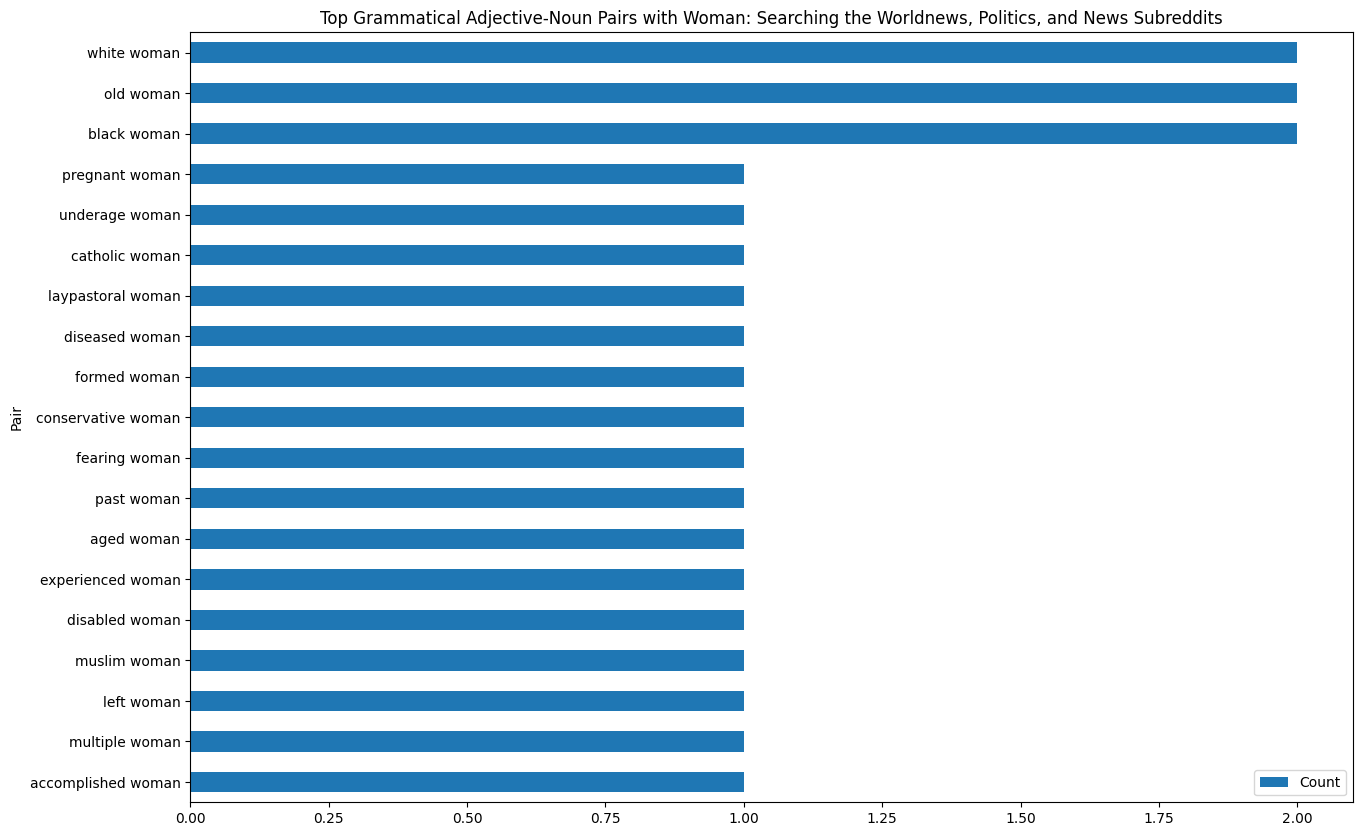

In [142]:
# remove stop words
female_adj_noun_pairs_no_stopwords = removeStopWords(female_adj_noun_pairs)

# create a dictionary with each unique pair and its frequency
female_adj_noun_dictionary = countWords(female_adj_noun_pairs_no_stopwords)

# create a data frame from our dictionary of grammatical pairs
female_adj_noun_df = pd.DataFrame(female_adj_noun_dictionary.items(),columns = ['Pair','Count'])

# arrange in ascending order
female_adj_noun_df.sort_values(by=['Count'], inplace=True, ascending=False)

top_female_adj_noun_counts = female_adj_noun_df[:45].copy()

# set the parameters of the visualization
plt.rcParams['figure.figsize'] = [15, 10]

# sort the pairs for visualization
top_female_adj_noun_counts.sort_values(by=['Count'], inplace=True, ascending=True)

# render visualization
top_female_adj_noun_counts.plot.barh(x = "Pair", y = "Count",
            title = "Top Grammatical Adjective-Noun Pairs with Woman: Searching the Worldnews, Politics, and News Subreddits")

In [147]:
def extractMaleAdjNounPairs(lowercase_adjective_noun_pairs):
    regex = re.compile('\\bman\\b')
    man = [word for word in lowercase_adjective_noun_pairs if regex.search(word)]
    return man

male_adj_noun_pairs = extractMaleAdjNounPairs(lowercase_adjective_noun_pairs)

<Axes: title={'center': 'Top Grammatical Adjective-Noun Pairs with Man: Searching the Worldnews, Politics, and News Subreddits'}, ylabel='Pair'>

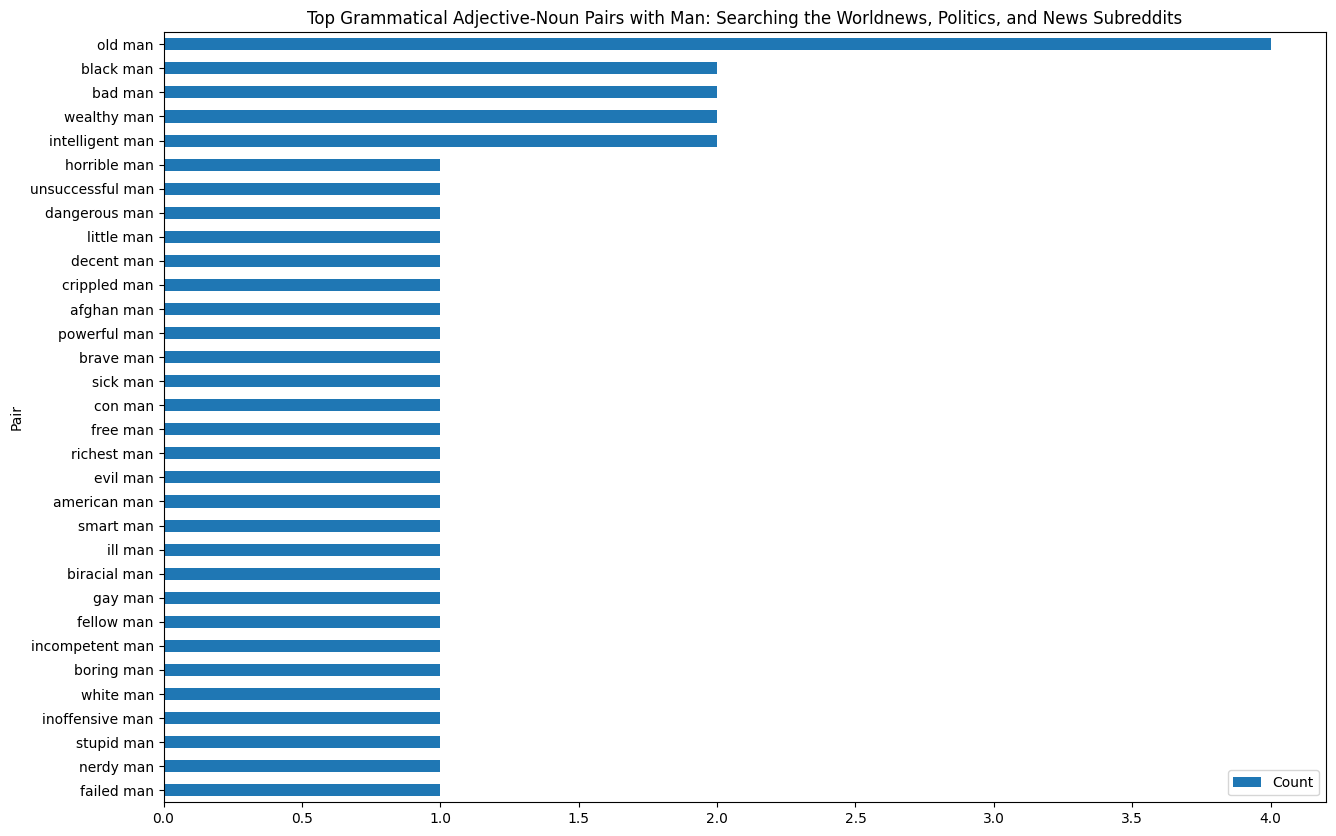

In [148]:
# remove stop words
male_adj_noun_pairs_no_stopwords = removeStopWords(male_adj_noun_pairs)

# create a dictionary with each unique pair and its frequency
male_adj_noun_dictionary = countWords(male_adj_noun_pairs_no_stopwords)

# create a data frame from our dictionary of grammatical pairs
male_adj_noun_df = pd.DataFrame(male_adj_noun_dictionary.items(), columns=['Pair', 'Count'])

# arrange in ascending order
male_adj_noun_df.sort_values(by=['Count'], inplace=True, ascending=False)

top_male_adj_noun_counts = male_adj_noun_df[:45].copy()

# set the parameters of the visualization
plt.rcParams['figure.figsize'] = [15, 10]

# sort the pairs for visualization
top_male_adj_noun_counts.sort_values(by=['Count'], inplace=True, ascending=True)

# render visualization
top_male_adj_noun_counts.plot.barh(
    x="Pair",
    y="Count",
    title="Top Grammatical Adjective-Noun Pairs with Man: Searching the Worldnews, Politics, and News Subreddits")
